In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
file_path = '/Users/yaswanthkumardamarla/Downloads/archive/credit_card_transactions-ibm_v2.csv'
fin_fraud_data = pd.read_csv(file_path)
fin_fraud_copy = fin_fraud_data.copy()

In [4]:
fin_fraud_copy.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


In [5]:
print(fin_fraud_copy.columns.tolist())

['User', 'Card', 'Year', 'Month', 'Day', 'Time', 'Amount', 'Use Chip', 'Merchant Name', 'Merchant City', 'Merchant State', 'Zip', 'MCC', 'Errors?', 'Is Fraud?']


In [6]:
selected_columns = ['User', 'Card', 'Year', 'Month', 'Day', 'Time', 'Amount', 'Use Chip', 'Merchant Name', 'Merchant City', 'Merchant State', 'Zip', 'MCC', 'Errors?', 'Is Fraud?']
df = fin_fraud_copy[selected_columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386900 entries, 0 to 24386899
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   User            int64  
 1   Card            int64  
 2   Year            int64  
 3   Month           int64  
 4   Day             int64  
 5   Time            object 
 6   Amount          object 
 7   Use Chip        object 
 8   Merchant Name   int64  
 9   Merchant City   object 
 10  Merchant State  object 
 11  Zip             float64
 12  MCC             int64  
 13  Errors?         object 
 14  Is Fraud?       object 
dtypes: float64(1), int64(7), object(7)
memory usage: 2.7+ GB


In [13]:
df['Use Chip'].value_counts()

Use Chip
Swipe Transaction     15386082
Chip Transaction       6287598
Online Transaction     2713220
Name: count, dtype: int64

In [15]:
data1 = df.groupby('Use Chip').size().reset_index(name='count')

In [17]:
df_trans_type = data1.copy()
df_trans_type.rename(columns={'Use Chip': 'transactions', 'count': 'trans_total'}, inplace=True)
df_trans_type.head(5)

,transactions,trans_total
0,Chip Transaction,6287598
1,Online Transaction,2713220
2,Swipe Transaction,15386082


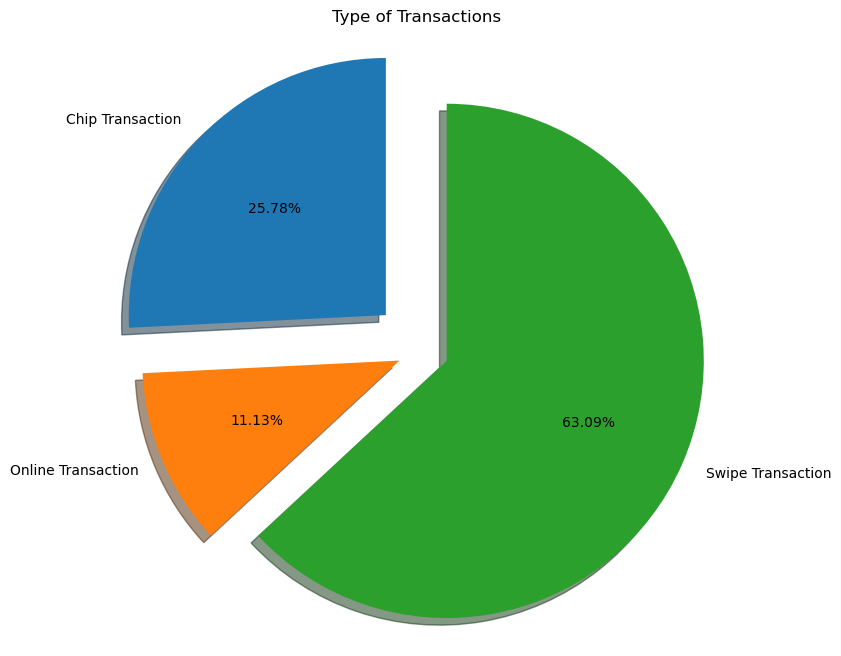

In [19]:
labels = df_trans_type.transactions
volume = df_trans_type.trans_total
explode = (0.2, 0.1, 0.1)  # Match number of items in 'volume'

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(volume, labels=labels, startangle=90, shadow=True, autopct='%1.2f%%', explode=explode)

# Title and formatting
plt.title('Type of Transactions')
plt.axis('equal')
plt.show()

In [21]:
import pandas as pd

chunk_size = 500_000
group_totals = {}

cols = ['Use Chip', 'Amount']
for chunk in pd.read_csv('/Users/yaswanthkumardamarla/Downloads/archive/credit_card_transactions-ibm_v2.csv',
                         usecols=cols, chunksize=chunk_size):
    # Remove $ and convert to float
    chunk['Amount'] = chunk['Amount'].replace(r'[\$,]', '', regex=True).astype(float)

    # Group and sum
    grouped = chunk.groupby('Use Chip')['Amount'].sum()

    for chip_type, total in grouped.items():
        group_totals[chip_type] = group_totals.get(chip_type, 0) + total

# Convert to DataFrame
data2 = pd.DataFrame(list(group_totals.items()), columns=['Use Chip', 'total_amount'])

In [22]:
from math import floor

def number_format(number):
    # Format number to billions with 3 decimal places
    k = 1_000_000_000.0
    return '%.3f' % (number / k)

In [23]:
df_total_money = data2.copy()
df_total_money.rename(columns={
    'Use Chip': 'transactions',
    'total_amount': 'money_total_in_Billion'
}, inplace=True)

# Format to Billion (string)
df_total_money['money_total_in_Billion'] = \
    df_total_money['money_total_in_Billion'].apply(lambda x: number_format(x))

# Convert to float
df_total_money['money_total_in_Billion'] = \
    df_total_money['money_total_in_Billion'].apply(lambda x: float(x))

In [24]:
# df_total_money = df_total_money.sort_values(by='money_total_in_Billion')
df_total_money = df_total_money.sort_values(by='money_total_in_Billion')

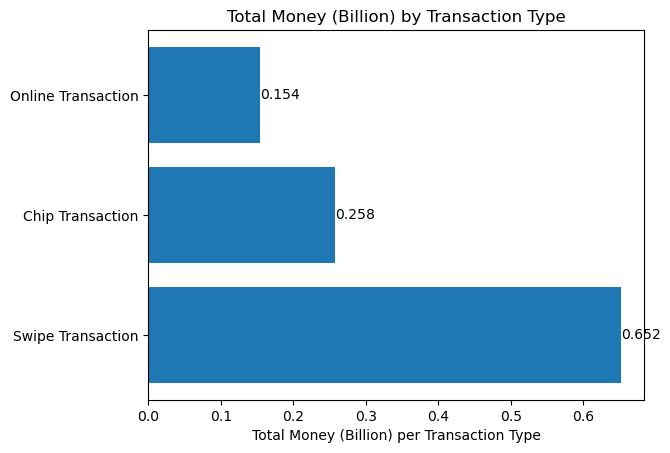

In [25]:
# labels = df_total_money.transactions
# y_pos = np.arange(len(labels))
# volume = df_total_money.money_total_in_Billion
# #bar chart
# fig, ax = plt.subplots()

# hbars = ax.barh(y_pos, volume, align='center')
# ax.set_yticks(y_pos, labels=labels)
# ax.invert_yaxis()
# ax.set_xlabel('total money (Billion) each type trans')
# ax.set_title('Total money (Billion) of each type of trans')

# #Label with specially formatted floats
# ax.bar_label(ax.containers[0])
# plt.show()

import numpy as np
import matplotlib.pyplot as plt

labels = df_total_money.transactions
y_pos = np.arange(len(labels))
volume = df_total_money.money_total_in_Billion

# Bar chart
fig, ax = plt.subplots()

hbars = ax.barh(y_pos, volume, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # highest value on top
ax.set_xlabel('Total Money (Billion) per Transaction Type')
ax.set_title('Total Money (Billion) by Transaction Type')

# Add value labels to bars
ax.bar_label(hbars, fmt='%.3f')

plt.show()

In [26]:
# Clean the 'Amount' column
df['Amount'] = df['Amount'].astype(str)  # ensure it's string for regex
df['Amount'] = df['Amount'].str.extract(r'\$?([\d.]+)', expand=False)  # extract only first valid dollar number
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')  # convert to float, NaNs for invalid

In [27]:
df_money_recd_each_destacc = df.groupby('Merchant Name').agg(
    count_trans=('Amount', 'size'),
    total_amount=('Amount', 'sum')
).reset_index()

In [28]:
df_money_recd_each_destacc['total_amount_Million'] = (
    df_money_recd_each_destacc['total_amount'] / 1_000_000.0
).round(3)

In [29]:
# Rename 'Merchant Name' to 'Dest_account'
df_money_recd_each_destacc.rename(columns={'Merchant Name': 'Dest_account'}, inplace=True)

# Set index to destination account
df_money_recd_each_destacc = df_money_recd_each_destacc.set_index('Dest_account')

# Convert total_amount (in dollars) to total_amount_Million (float in millions)
df_money_recd_each_destacc['total_amount_Million'] = \
    df_money_recd_each_destacc['total_amount'].apply(lambda x: round(x / 1_000_000.0, 3))

In [34]:
df_money_recd_each_destacc.head(5)

,count_trans,total_amount,total_amount_Million
Dest_account,,,
-9222899435637403521,92,1989.67,0.002
-9222692221935167526,1,144.74,0.000
-9222439367252190791,5,537.19,0.001
-9222264855000293132,3,133.58,0.000
-9222232253446715869,2,12.87,0.000


In [36]:
# Filter real frauds
fraud_df = df[df['Is Fraud?'] == 'Yes']

# Show how many there are
print(f"Real fraud count: {len(fraud_df)}")

# Check chip usage and error patterns
print("Chip usage counts:")
print(fraud_df['Use Chip'].value_counts())

print("\nError flag counts:")
print(fraud_df['Errors?'].value_counts())

print("\nMCC top values:")
print(fraud_df['MCC'].value_counts().head(10))

print("\nAmount summary for fraud:")
print(fraud_df['Amount'].describe())


Real fraud count: 29757
Chip usage counts:
Use Chip
Online Transaction    18349
Swipe Transaction      6572
Chip Transaction       4836
Name: count, dtype: int64

Error flag counts:
Errors?
Insufficient Balance                    396
Bad PIN                                 302
Bad CVV                                 280
Bad Expiration                          120
Bad Card Number                         105
Technical Glitch                         63
Bad PIN,Insufficient Balance              7
Bad CVV,Insufficient Balance              4
Bad Expiration,Bad CVV                    2
Bad Expiration,Technical Glitch           2
Bad Card Number,Insufficient Balance      2
Bad Expiration,Insufficient Balance       1
Bad PIN,Technical Glitch                  1
Bad CVV,Technical Glitch                  1
Name: count, dtype: int64

MCC top values:
MCC
5311    4824
5300    2201
5310    2152
4829    1607
5912    1057
5411     943
5815     879
5651     849
5732     843
5719     717
Name: count, dtyp

In [37]:
import numpy as np

# Copy DataFrame and ensure Amount is numeric
rules_fraud_based_df = df.copy()
rules_fraud_based_df['Amount'] = pd.to_numeric(rules_fraud_based_df['Amount'], errors='coerce')

# Define strong, data-backed fraud rules
conditions = (
    # 1. Online transaction + typical fraud amount range
    ((rules_fraud_based_df['Use Chip'] == 'Online Transaction') &
     (rules_fraud_based_df['Amount'].between(25, 165))) |
    
    # 2. Common fraud errors with moderate amounts
    ((rules_fraud_based_df['Errors?'].isin([
        'Insufficient Balance', 'Bad PIN', 'Bad CVV'
    ])) & (rules_fraud_based_df['Amount'] > 50)) |

    # 3. High-risk MCC with significant amounts
    ((rules_fraud_based_df['MCC'].isin(['5311', '5300', '5310', '4829'])) &
     (rules_fraud_based_df['Amount'] > 100))
)

# Apply label
rules_fraud_based_df['label'] = np.where(conditions, 1, 0)

# Calculate stats
fraud_cases = rules_fraud_based_df['label'].sum()
total_cases = len(rules_fraud_based_df)
fraud_pct = fraud_cases / total_cases

print(f"Based on these rules, we have flagged {fraud_cases} ({fraud_pct:.2%}) fraud cases out of a total of {total_cases} cases.")

Based on these rules, we have flagged 1885888 (7.73%) fraud cases out of a total of 24386900 cases.


In [38]:
rules_fraud_based_df.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,label
0,0,0,2002,9,1,06:21,134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No,0
1,0,0,2002,9,1,06:42,38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No,0
2,0,0,2002,9,2,06:22,120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No,0
3,0,0,2002,9,2,17:45,128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No,0
4,0,0,2002,9,3,06:23,104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No,0


In [39]:
data3 = rules_fraud_based_df.groupby('label').agg(
    count=('label', 'size'),
    total_amount=('Amount', 'sum')
).reset_index()

In [40]:
# Copy and clean up the grouped data
df_based_rules = data3.copy()

# Rename 'count' column to 'transactions'
df_based_rules.rename(columns={'count': 'transactions'}, inplace=True)

# Add readable label: 'fraud' for 1, 'normal' for 0
df_based_rules['flagged_label'] = np.where(df_based_rules['label'] == 1, 'fraud', 'normal')

# Reorder columns if desired
df_based_rules = df_based_rules[['flagged_label', 'transactions', 'total_amount']]

# Display the table
df_based_rules

,flagged_label,transactions,total_amount
0,normal,22501012,1.206271e+09
1,fraud,1885888,1.118718e+08


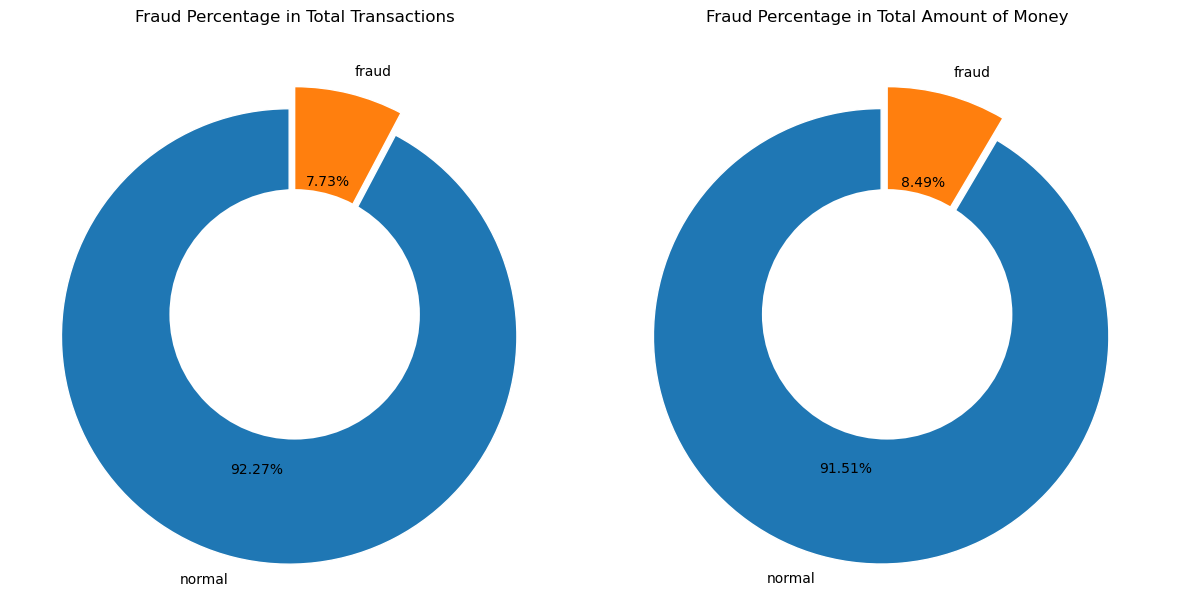

In [41]:
import matplotlib.pyplot as plt

# Labels and values
labels = df_based_rules['flagged_label']
volume = df_based_rules['transactions']
amount = df_based_rules['total_amount']
explode = (0.1, 0.0)  # Explode the 'fraud' slice for both pies

# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# --- Pie 1: Transaction Count Distribution ---
axs[0].pie(volume, labels=labels, autopct='%1.2f%%',
           explode=explode,
           startangle=90,
           wedgeprops={"edgecolor": "white", "linewidth": 1, "antialiased": True})
axs[0].set_title("Fraud Percentage in Total Transactions")

# Add donut hole
centre_circle_1 = plt.Circle((0, 0), 0.55, fc='white')
axs[0].add_artist(centre_circle_1)

# --- Pie 2: Total Amount Distribution ---
axs[1].pie(amount, labels=labels, autopct='%1.2f%%',
           explode=explode,
           startangle=90,
           wedgeprops={"edgecolor": "white", "linewidth": 1, "antialiased": True})
axs[1].set_title("Fraud Percentage in Total Amount of Money")

# Add donut hole
centre_circle_2 = plt.Circle((0, 0), 0.55, fc='white')
axs[1].add_artist(centre_circle_2)

# Display the plots
plt.tight_layout()
plt.show()

In [42]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, regexp_replace, when

# ✅ Start Spark Session
spark = SparkSession.builder \
    .appName("CreditCardFraudDetection") \
    .config("spark.sql.shuffle.partitions", "700") \
    .config("spark.driver.memory", "8g") \
    .config("spark.executor.memory", "8g") \
    .getOrCreate()

# ✅ Step 1: Read CSV File
df = spark.read.option("header", True)\
               .option("inferSchema", True)\
               .option("multiLine", True)\
               .option("escape", "\"")\
               .option("quote", "\"")\
               .option("mode", "DROPMALFORMED")\
               .csv("/Users/yaswanthkumardamarla/Downloads/archive/credit_card_transactions-ibm_v2.csv")

# ✅ Step 2: Clean Column Names
for col_name in df.columns:
    clean_name = col_name.strip().replace(" ", "_").replace("?", "").replace("-", "_")
    df = df.withColumnRenamed(col_name, clean_name)

# ✅ Step 3: Clean 'Amount' column by removing dollar sign and casting to float
df = df.withColumn("Amount", regexp_replace("Amount", "[$,]", "").cast("float"))

# ✅ Step 4: Convert 'Is_Fraud' column to binary 'isFraud'
df = df.withColumn("isFraud", when(col("Is_Fraud") == "Yes", 1).otherwise(0))

# ✅ Step 5: Drop original 'Is_Fraud' column
df = df.drop("Is_Fraud")

# ✅ Step 6: Verify data
df.select("isFraud", "Amount", "Use_Chip").summary().show()
df.groupBy("isFraud").count().show()


25/05/07 01:15:01 WARN Utils: Your hostname, Yaswanths-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.0.0.106 instead (on interface en0)
25/05/07 01:15:01 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/05/07 01:15:01 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/05/07 01:15:28 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+--------------------+-----------------+-----------------+
|summary|             isFraud|           Amount|         Use_Chip|
+-------+--------------------+-----------------+-----------------+
|  count|            24386900|         24386900|         24386900|
|   mean|0.001220204290008...|43.63400502557019|             NULL|
| stddev| 0.03491010514840967|82.02239004263397|             NULL|
|    min|                   0|           -500.0| Chip Transaction|
|    25%|                   0|             9.21|             NULL|
|    50%|                   0|            30.13|             NULL|
|    75%|                   0|            65.05|             NULL|
|    max|                   1|          12390.5|Swipe Transaction|
+-------+--------------------+-----------------+-----------------+



+-------+--------+
|isFraud|   count|
+-------+--------+
|      1|   29757|
|      0|24357143|
+-------+--------+



In [49]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, regexp_replace, when
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# ✅ Step 1: Start Spark session
spark = SparkSession.builder \
    .appName("CreditCardFraudDetection") \
    .config("spark.sql.shuffle.partitions", "700") \
    .config("spark.driver.memory", "8g") \
    .config("spark.executor.memory", "8g") \
    .getOrCreate()

# ✅ Step 2: Read CSV file
df = spark.read.option("header", True)\
               .option("inferSchema", True)\
               .option("multiLine", True)\
               .option("escape", "\"")\
               .option("quote", "\"")\
               .option("mode", "DROPMALFORMED")\
               .csv("/Users/yaswanthkumardamarla/Downloads/archive/credit_card_transactions-ibm_v2.csv")

# ✅ Step 3: Clean column names
for col_name in df.columns:
    clean_name = col_name.strip().replace(" ", "_").replace("?", "").replace("-", "_")
    df = df.withColumnRenamed(col_name, clean_name)

# ✅ Step 4: Clean 'Amount' column and cast to float
df = df.withColumn("Amount", regexp_replace("Amount", "[$,]", "").cast("float"))

# ✅ Step 5: Create isFraud binary column
df = df.withColumn("isFraud", when(col("Is_Fraud") == "Yes", 1).otherwise(0)).drop("Is_Fraud")

# ✅ Step 6: Filter nulls in critical fields
df_clean = df.filter(col("Amount").isNotNull() & col("Use_Chip").isNotNull())

# ✅ Step 7: Index categorical feature
indexer = StringIndexer(inputCol="Use_Chip", outputCol="Use_Chip_Indexed")

# ✅ Step 8: Assemble features
assembler = VectorAssembler(inputCols=["Use_Chip_Indexed", "Amount"], outputCol="features")

# ✅ Step 9: Classifier
rf = RandomForestClassifier(labelCol="isFraud", featuresCol="features", numTrees=20)

# ✅ Step 10: Pipeline
pipeline = Pipeline(stages=[indexer, assembler, rf])

# ✅ Step 11: Sample data to avoid memory overflow
df_sampled = df_clean.sample(False, fraction=1_000_000 / df_clean.count(), seed=42)

# ✅ Step 12: Train/Test split
train, test = df_sampled.randomSplit([0.8, 0.2], seed=42)

# ✅ Step 13: Fit model
rf_model = pipeline.fit(train)

# ✅ Step 14: Evaluate model
predictions = rf_model.transform(test)

evaluator_acc = MulticlassClassificationEvaluator(labelCol="isFraud", predictionCol="prediction", metricName="accuracy")
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="isFraud", predictionCol="prediction", metricName="f1")

accuracy = evaluator_acc.evaluate(predictions)
f1_score = evaluator_f1.evaluate(predictions)

print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ F1 Score: {f1_score:.4f}")

# ✅ Step 15: Show predictions
predictions.select("isFraud", "prediction", "probability", "Amount", "Use_Chip").show(10, truncate=False)

# ✅ Step 16: Show Tree summary
print(rf_model.stages[-1].toDebugString)


✅ Accuracy: 0.9987
✅ F1 Score: 0.9981


+-------+----------+------------------------------------------+------+-----------------+
|isFraud|prediction|probability                               |Amount|Use_Chip         |
+-------+----------+------------------------------------------+------+-----------------+
|0      |0.0       |[0.9987292387424367,0.0012707612575633184]|31.01 |Swipe Transaction|
|0      |0.0       |[0.9987292387424367,0.0012707612575633184]|42.01 |Swipe Transaction|
|0      |0.0       |[0.9987292387424367,0.0012707612575633184]|50.68 |Swipe Transaction|
|0      |0.0       |[0.9987292387424367,0.0012707612575633184]|123.66|Swipe Transaction|
|0      |0.0       |[0.9987292387424367,0.0012707612575633184]|6.24  |Swipe Transaction|
|0      |0.0       |[0.9987292387424367,0.0012707612575633184]|110.94|Swipe Transaction|
|0      |0.0       |[0.9987292387424367,0.0012707612575633184]|36.0  |Swipe Transaction|
|0      |0.0       |[0.9987292387424367,0.0012707612575633184]|57.32 |Swipe Transaction|
|0      |0.0       |[

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import seaborn as sns

# Convert predictions to Pandas
preds_df = predictions.select("isFraud", "prediction", "probability", "Amount", "Use_Chip").toPandas()

# Extract class probabilities
preds_df["prob_1"] = preds_df["probability"].apply(lambda x: float(x[1]))


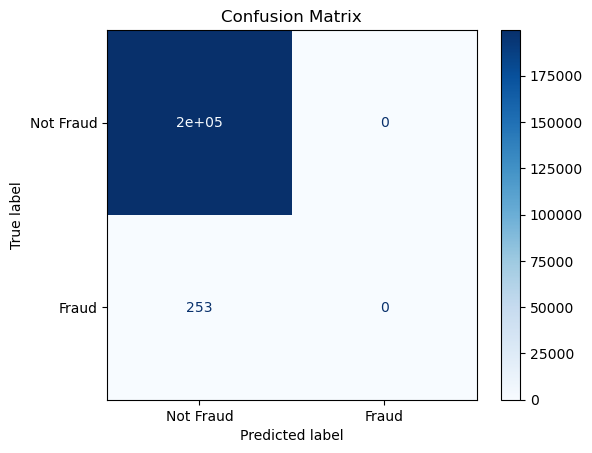

In [51]:
# Confusion Matrix
cm = confusion_matrix(preds_df["isFraud"], preds_df["prediction"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

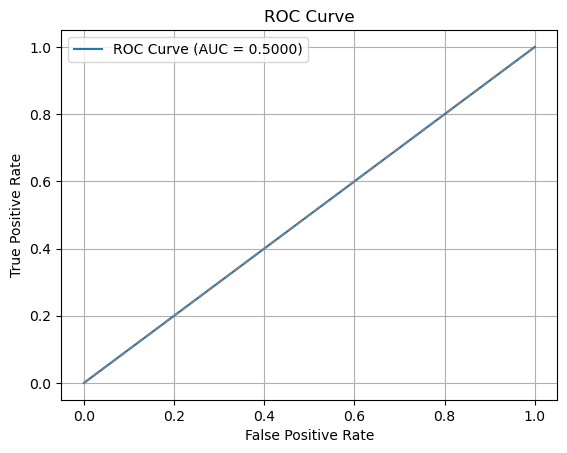

In [52]:
# ROC Curve
fpr, tpr, _ = roc_curve(preds_df["isFraud"], preds_df["prob_1"])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [55]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer

# Index categorical columns you're using
indexers = [
    StringIndexer(inputCol="Use_Chip", outputCol="Use_Chip_Indexed"),
    StringIndexer(inputCol="Merchant_State", outputCol="State_Indexed", handleInvalid="keep"),
    StringIndexer(inputCol="Errors", outputCol="Errors_Indexed", handleInvalid="keep"),
    StringIndexer(inputCol="MCC", outputCol="MCC_Indexed", handleInvalid="keep"),
]

# Fit just the indexers on training data
indexer_pipeline = Pipeline(stages=indexers)
indexer_model = indexer_pipeline.fit(train)

# Transform the training data
indexed_train = indexer_model.transform(train)

# Optionally extract Hour from "Time"
from pyspark.sql.functions import substring
indexed_train = indexed_train.withColumn("Hour", substring("Time", 1, 2).cast("int"))

# Feature list you're working with
features_input = [
    "Use_Chip_Indexed", "Amount", "State_Indexed",
    "Errors_Indexed", "MCC_Indexed", "Hour", "Month", "Day"
]

# Convert to Pandas for inspection or visualization
dataset = indexed_train.select(features_input + ["isFraud"]).toPandas()


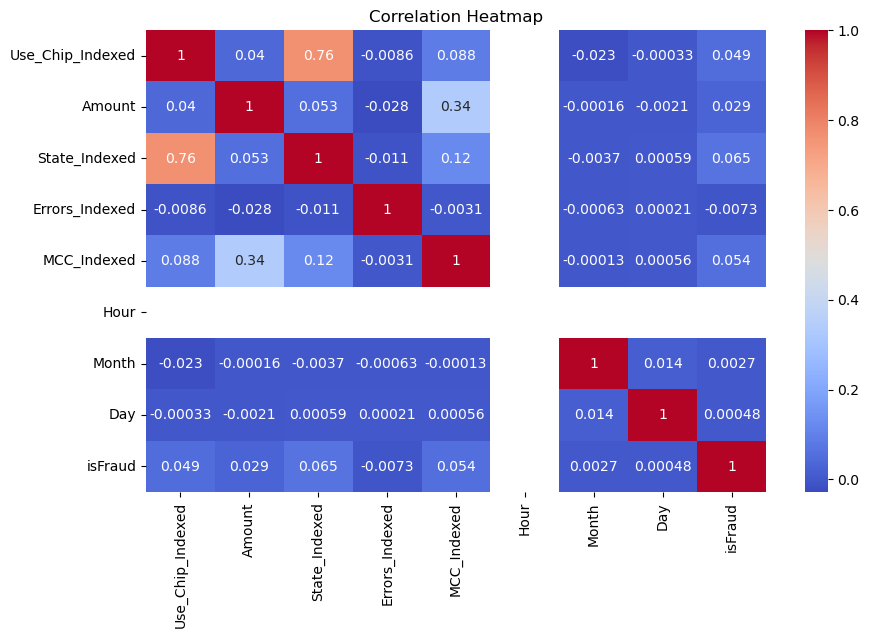

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Quick correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [75]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, regexp_replace, when
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# ✅ Step 1: Start Spark session
spark = SparkSession.builder \
    .appName("CreditCardFraudDetection_LR") \
    .config("spark.sql.shuffle.partitions", "700") \
    .config("spark.driver.memory", "8g") \
    .config("spark.executor.memory", "8g") \
    .getOrCreate()

# ✅ Step 2: Read CSV file
df = spark.read.option("header", True)\
               .option("inferSchema", True)\
               .option("multiLine", True)\
               .option("escape", "\"")\
               .option("quote", "\"")\
               .option("mode", "DROPMALFORMED")\
               .csv("/Users/yaswanthkumardamarla/Downloads/archive/credit_card_transactions-ibm_v2.csv")

# ✅ Step 3: Clean column names
for col_name in df.columns:
    clean_name = col_name.strip().replace(" ", "_").replace("?", "").replace("-", "_")
    df = df.withColumnRenamed(col_name, clean_name)

# ✅ Step 4: Clean 'Amount' column and cast to float
df = df.withColumn("Amount", regexp_replace("Amount", "[$,]", "").cast("float"))

# ✅ Step 5: Create isFraud binary column
df = df.withColumn("isFraud", when(col("Is_Fraud") == "Yes", 1).otherwise(0)).drop("Is_Fraud")

# ✅ Step 6: Filter nulls in critical fields
df_clean = df.filter(col("Amount").isNotNull() & col("Use_Chip").isNotNull())

# ✅ Step 7: Index categorical feature
indexer = StringIndexer(inputCol="Use_Chip", outputCol="Use_Chip_Indexed")

# ✅ Step 8: Assemble features
assembler = VectorAssembler(inputCols=["Use_Chip_Indexed", "Amount"], outputCol="features")

# ✅ Step 9: Classifier (Logistic Regression)
lr = LogisticRegression(featuresCol="features", labelCol="isFraud")

# ✅ Step 10: Pipeline
pipeline = Pipeline(stages=[indexer, assembler, lr])

# ✅ Step 11: Sample data to avoid memory overflow
df_sampled = df_clean.sample(False, fraction=1_000_000 / df_clean.count(), seed=42)

# ✅ Step 12: Train/Test split
train, test = df_sampled.randomSplit([0.8, 0.2], seed=42)

# ✅ Step 13: Fit model
lr_model = pipeline.fit(train)

# ✅ Step 14: Evaluate model
predictions = lr_model.transform(test)

evaluator_acc = MulticlassClassificationEvaluator(labelCol="isFraud", predictionCol="prediction", metricName="accuracy")
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="isFraud", predictionCol="prediction", metricName="f1")
evaluator_auc = BinaryClassificationEvaluator(labelCol="isFraud", metricName="areaUnderROC")

accuracy = evaluator_acc.evaluate(predictions)
f1_score = evaluator_f1.evaluate(predictions)
auc_score = evaluator_auc.evaluate(predictions)

print(f"✅ Logistic Regression Accuracy: {accuracy:.4f}")
print(f"✅ Logistic Regression F1 Score: {f1_score:.4f}")
print(f"✅ Logistic Regression AUC-ROC: {auc_score:.4f}")

# ✅ Step 15: Show predictions
predictions.select("isFraud", "prediction", "probability", "Amount", "Use_Chip").show(10, truncate=False)

25/05/07 02:10:20 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.
25/05/07 02:13:47 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS


✅ Logistic Regression Accuracy: 0.9987
✅ Logistic Regression F1 Score: 0.9981
✅ Logistic Regression AUC-ROC: 0.7924


+-------+----------+------------------------------------------+------+-----------------+
|isFraud|prediction|probability                               |Amount|Use_Chip         |
+-------+----------+------------------------------------------+------+-----------------+
|0      |0.0       |[0.9997138674061025,2.8613259389753676E-4]|31.01 |Swipe Transaction|
|0      |0.0       |[0.9997053331596186,2.946668403813746E-4] |42.01 |Swipe Transaction|
|0      |0.0       |[0.9996984276684799,3.0157233152006135E-4]|50.68 |Swipe Transaction|
|0      |0.0       |[0.9996335026772508,3.664973227491819E-4] |123.66|Swipe Transaction|
|0      |0.0       |[0.9997321911784558,2.6780882154420205E-4]|6.24  |Swipe Transaction|
|0      |0.0       |[0.9996457481835399,3.5425181646009385E-4]|110.94|Swipe Transaction|
|0      |0.0       |[0.9997100270205385,2.899729794615391E-4] |36.0  |Swipe Transaction|
|0      |0.0       |[0.9996930298388447,3.069701611553288E-4] |57.32 |Swipe Transaction|
|0      |0.0       |[